In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Consutorias/Brasil Seg/data_raw/clientes.csv")

#Objetivo da Etapa
Realizar uma avaliação da qualidade dos dados, assegurando que a base esteja preparada para modelagens futuras (segmentação, predição, etc.).

Metodologia aplicada
Análise de nulos por variável (absoluto e percentual);

Regra do IQR (Interquartile Range) para detectar outliers;

Avaliação de unicidade da chave primária (id_cliente);

Uso de df.head() para visualizar os primeiros registros.

In [ ]:
df.columns

Index(['id_cliente', 'idade', 'estado_civil', 'tempo_cliente_meses',
       'possui_outros_produtos', 'perfil_risco'],
      dtype='object')

In [ ]:
df.dtypes.tolist()

[dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('int64'),
 dtype('O'),
 dtype('O')]

In [ ]:
total_linhas = len(df)
total_coluns = df.shape[1]

print(f"Dimensões do Dataframe:{total_linhas} linhas e {total_coluns} colunas.")

Dimensões do Dataframe:300 linhas e 6 colunas.


In [ ]:
total_na = df.isna().sum().sum()
na_variavel = df.isna().sum()

perc_na = na_variavel / total_linhas * 100

print(f"Total de valores nulos no DataFrame: {total_na}.")
print("\nDistribuição percentual de nulos por variavel.")
print(perc_na)

Total de valores nulos no DataFrame: 0.

Distribuição percentual de nulos por variavel.
id_cliente                0.0
idade                     0.0
estado_civil              0.0
tempo_cliente_meses       0.0
possui_outros_produtos    0.0
perfil_risco              0.0
dtype: float64


In [ ]:
duplicatas = df.duplicated(subset="id_cliente").sum()
print(f"Clientes duplicados pelo ID: {duplicatas}")

Clientes duplicados pelo ID: 0


In [ ]:
q1 = df["idade"].quantile(0.25)
q3 = df["idade"].quantile(0.75)
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

outliers_idade = df[(df["idade"] < limite_inferior) | (df["idade"] > limite_superior)]
print(f"Clientes com outliers em idade: {outliers_idade.shape[0]}")

Clientes com outliers em idade: 0


In [ ]:
q1 = df["tempo_cliente_meses"].quantile(0.25)
q3 = df["tempo_cliente_meses"].quantile(0.75)
iqr = q3 - q1
limite_inf = q1 - 1.5 * iqr
limite_sup = q3 + 1.5 * iqr

outliers_tempo = df[(df["tempo_cliente_meses"] < limite_inf) | (df["tempo_cliente_meses"] > limite_sup)]
print(f"Clientes com outliers no tempo de cliente: {outliers_tempo.shape[0]}")

Clientes com outliers no tempo de cliente: 0


In [ ]:
df.head()

,id_cliente,idade,estado_civil,tempo_cliente_meses,possui_outros_produtos,perfil_risco
0,1000,56,viúvo,67,não,médio
1,1001,69,solteiro,76,sim,médio
2,1002,46,divorciado,26,sim,médio
3,1003,32,viúvo,16,sim,baixo
4,1004,60,solteiro,51,sim,alto


#Objetivo da Etapa
Preparar os dados para modelagem preditiva ou segmentação;

Avaliar relação entre perfil de risco e outras características;

Explorar comportamento das variáveis discretas e contínuas;

Identificar possíveis sinais de clusterização ou regressão explicativa.Metodologia Utilizada
Foi realizada uma codificação ordinal das variáveis categóricas com significância hierárquica (ex: risco "baixo" < "médio" < "alto").

A transformação garante compatibilidade com modelos estatísticos e algoritmos de machine learning.

As variáveis categóricas convertidas foram:

- estado_civil
- possui_outros_produtos
- perfil_risco

A matriz permite identificar relacionamentos lineares entre variáveis.

Destaques importantes:

Correlação entre perfil de risco e idade ou tempo como cliente;

Relação entre posse de produtos e perfil pode sugerir engajamento ou afinidade.

Distribuição Univariada das Variáveis
* Histogramas com curva de densidade (kde=True) foram gerados para todas as variáveis:

* Idade: avalia faixas etárias dominantes;

* Tempo como cliente: ajuda a identificar perfis novos ou fidelizados;

* Perfil de risco: avalia a distribuição e predominância de perfis;

* Outros produtos: binária (0 ou 1), identifica o engajamento multicanal.



In [ ]:
estado_civil = df["estado_civil"].unique()
produtos = df["possui_outros_produtos"].unique()
perfil_risco = df["perfil_risco"].unique()

print("*Classificação das variaveis categoricas*")
print(f"\n-Estado Civil: {estado_civil}")
print(f"-Possui outros produtos: {produtos}")
print(f"-Perfil de risco: {perfil_risco}")


*Classificação das variaveis categoricas*

-Estado Civil: ['viúvo' 'solteiro' 'divorciado' 'casado']
-Possui outros produtos: ['não' 'sim']
-Perfil de risco: ['médio' 'baixo' 'alto']


In [ ]:
estado_civil_map = {"solteiro":1, "casado":2, "divorciado":3, "viuvo": 4}
produtos_map = {"não":0, "sim":1}
perfil_risco_map = {"alto":3, "médio":2, "baixo":1}

In [ ]:
df_selecionado = df[["id_cliente", "idade", "estado_civil", "tempo_cliente_meses",
                     "possui_outros_produtos", "perfil_risco"]]

df_selecionado["estado_civil"] = df_selecionado["estado_civil"].map(estado_civil_map)
df_selecionado["possui_outros_produtos"] = df_selecionado["possui_outros_produtos"].map(produtos_map)
df_selecionado["perfil_risco"] = df_selecionado["perfil_risco"].map(perfil_risco_map)

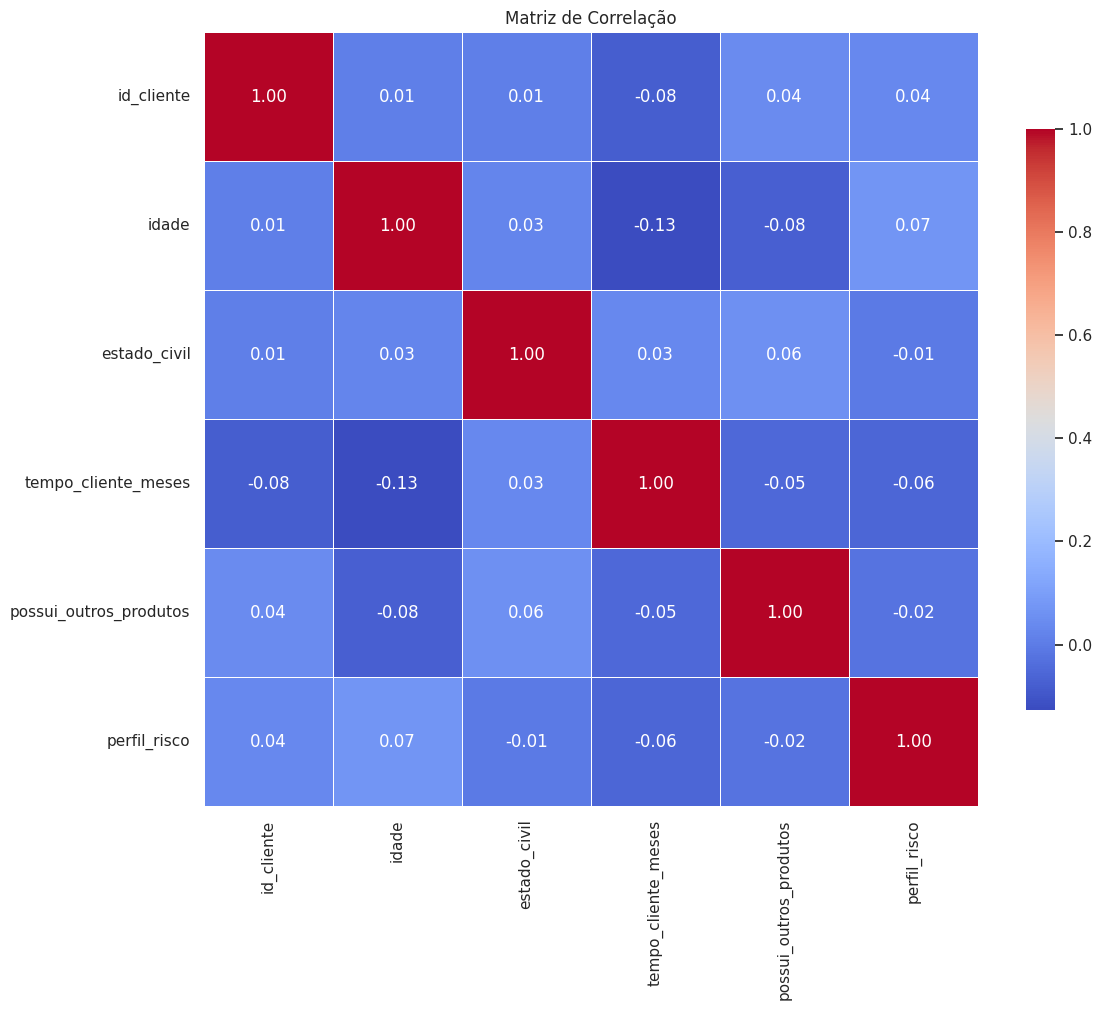

In [ ]:
matrix_corr = df_selecionado.corr()
plt.figure(figsize=(12,10))
sns.set(style="white")

sns.heatmap(matrix_corr, annot = True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5, cbar_kws={"shrink":0.75})

plt.title("Matriz de Correlação")
plt.tight_layout()
plt.show()

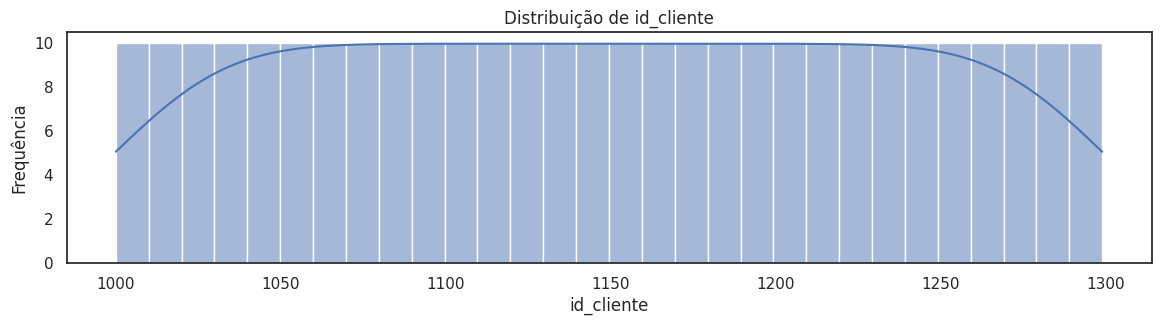

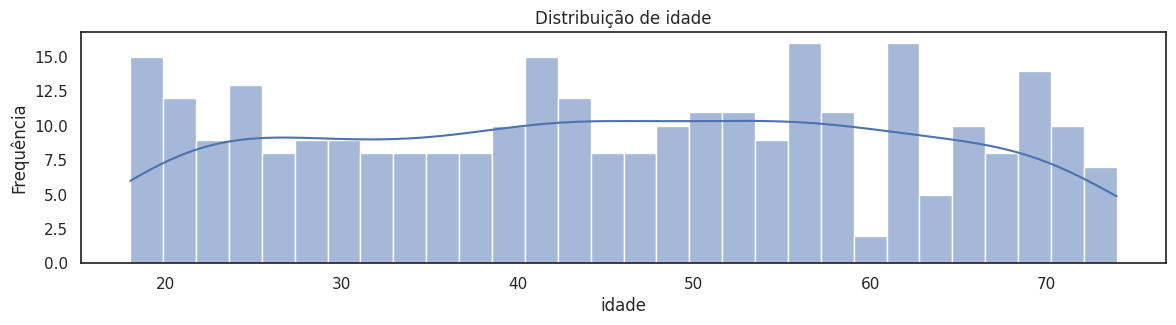

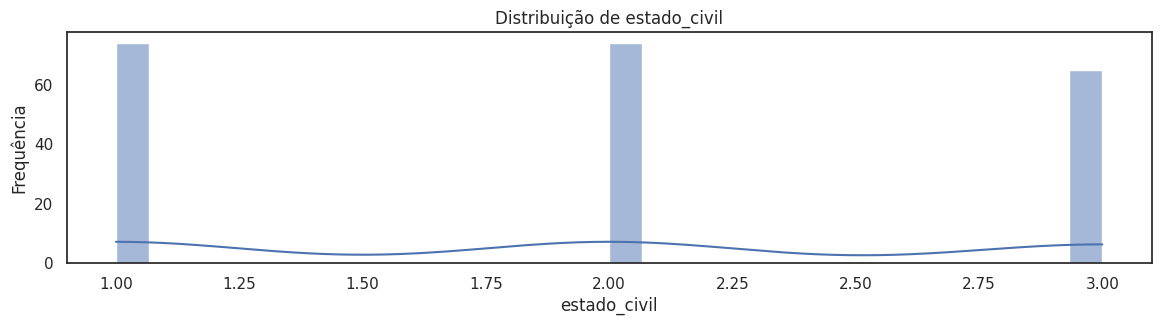

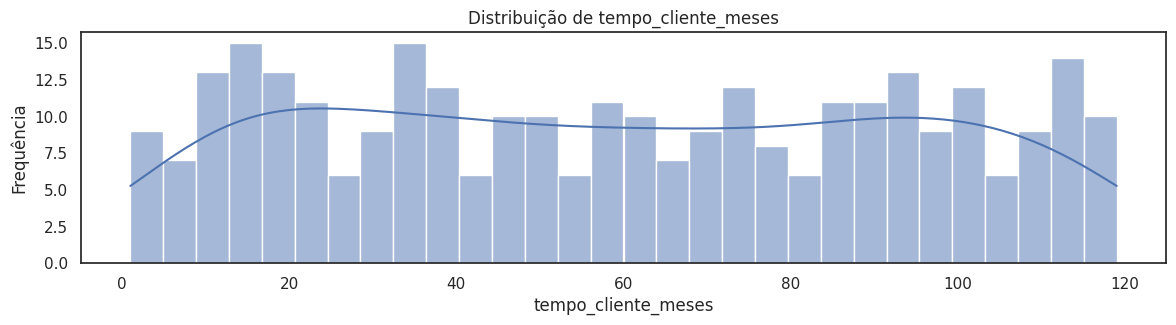

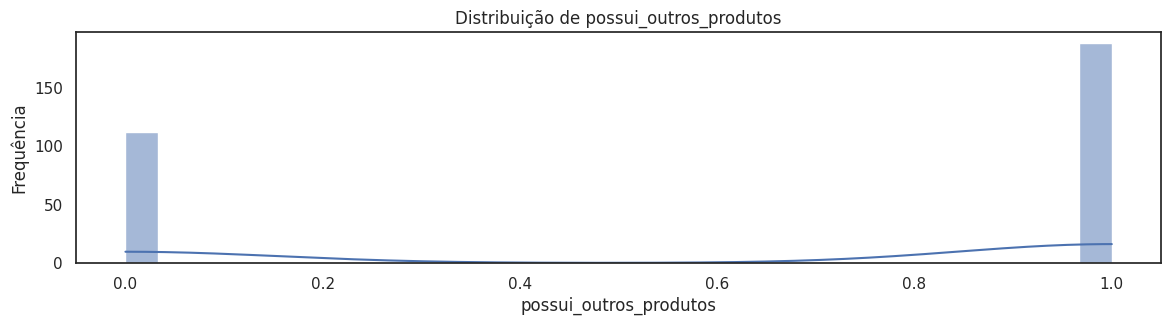

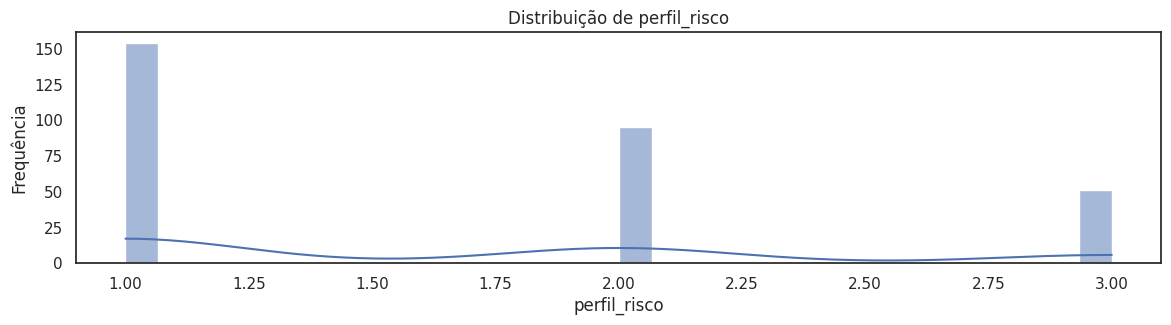

In [ ]:
for col in df_selecionado.columns:
    plt.figure(figsize=(14, 3))
    sns.histplot(df_selecionado[col], kde=True, bins=30)
    plt.title(f"Distribuição de {col}")
    plt.ylabel("Frequência")
    plt.show()

#Obijetivo da Etapa
| Análise                           | Finalidade                                     |
| --------------------------------- | ---------------------------------------------- |
| Estado civil × idade              | Avaliar perfis predominantes por faixa etária  |
| Perfil de risco × outros produtos | Entender grau de envolvimento por perfil       |
| Perfil de risco × idade           | Explorar risco com base no tempo de vida       |
| Faixa etária × risco              | Visualizar densidade etária por tipo de perfil |

1. Distribuição da Idade por Estado Civil
**Objetivo**: Avaliar diferenças etárias entre os grupos de estado civil.

2. Relação entre Perfil de Risco e Posses / Estado Civil
Permite entender como o perfil de risco varia com outras categorias

3. Distribuição da Idade por Perfil de Risco
oxplot seguido de estatísticas descritivas para entender:

* Tendência central (mediana por perfil);
* Amplitude de idade por grupo de risco;
* Avaliação de outliers.

4. Pirâmide Etária por Perfil de Risco
**Objetivo:** Visualizar a distribuição etária empilhada por perfil de risco.



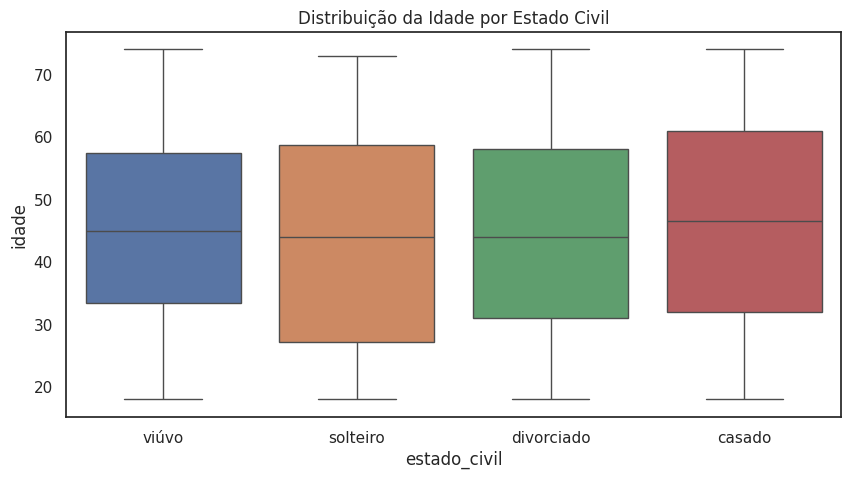

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="estado_civil", y="idade", hue="estado_civil", data=df)
plt.title("Distribuição da Idade por Estado Civil")
plt.show()

<Axes: xlabel='perfil_risco', ylabel='count'>

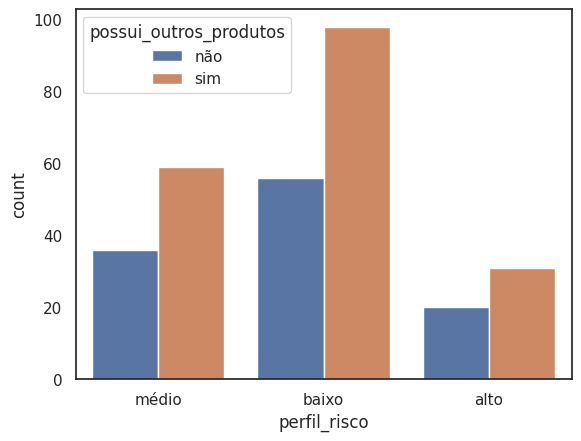

In [ ]:
sns.countplot(data=df, x="perfil_risco", hue="possui_outros_produtos")

<Axes: xlabel='perfil_risco', ylabel='count'>

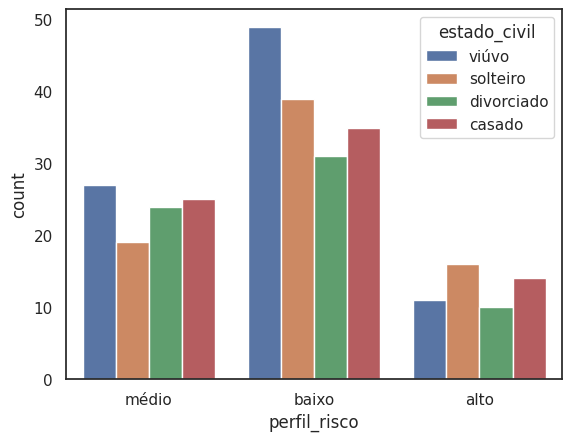

In [ ]:
sns.countplot(data = df, x = "perfil_risco", hue = "estado_civil")

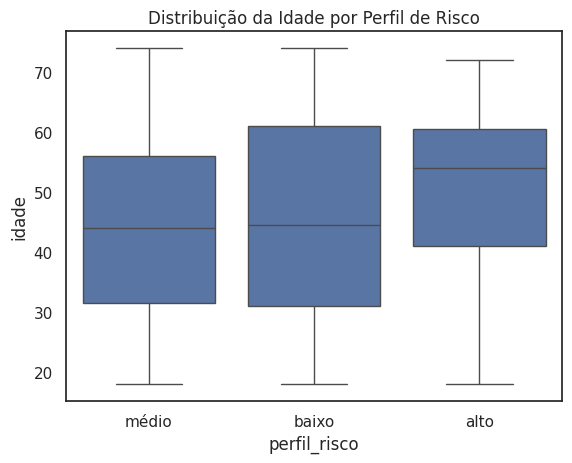

In [ ]:
sns.boxplot(data=df, x="perfil_risco", y="idade")
plt.title("Distribuição da Idade por Perfil de Risco")
plt.show()

In [ ]:
df.groupby("perfil_risco")["idade"].describe()

,count,mean,std,min,25%,50%,75%,max
perfil_risco,,,,,,,,
alto,51.0,49.450980,16.060279,18.0,41.0,54.0,60.5,72.0
baixo,154.0,45.155844,16.790571,18.0,31.0,44.5,61.0,74.0
médio,95.0,43.810526,15.942246,18.0,31.5,44.0,56.0,74.0


/tmp/ipython-input-25-3057698346.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_etaria = df.groupby(['faixa_etaria', 'perfil_risco']).size().reset_index(name='quantidade')


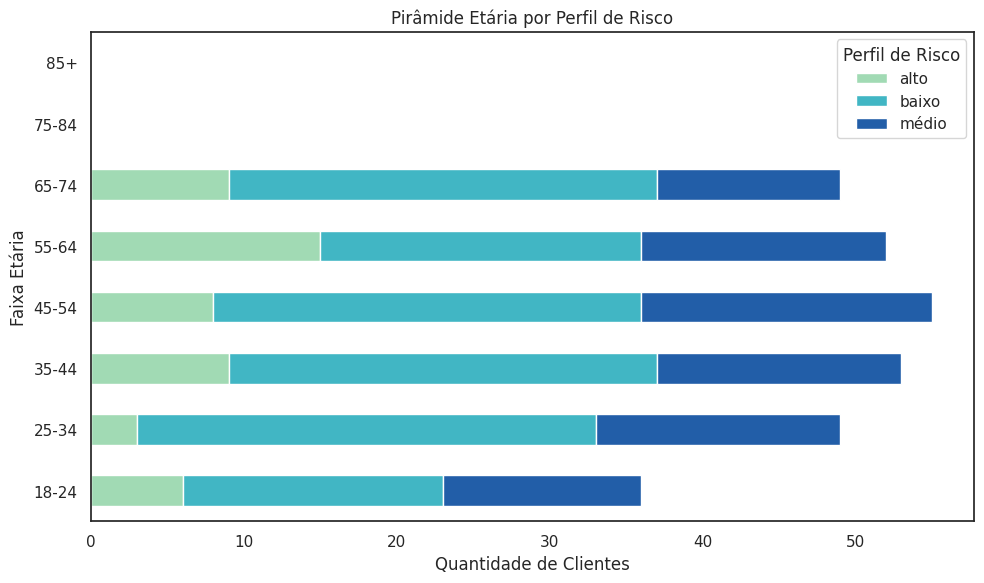

In [ ]:
bins = [18, 24, 34, 44, 54, 64, 74, 84, 100]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85+']
df['faixa_etaria'] = pd.cut(df['idade'], bins=bins, labels=labels, right=True)

df_etaria = df.groupby(['faixa_etaria', 'perfil_risco']).size().reset_index(name='quantidade')
df_pivot = df_etaria.pivot(index='faixa_etaria', columns='perfil_risco', values='quantidade').fillna(0)

faixa_ordenada = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85+']
df_pivot = df_pivot.reindex(faixa_ordenada)

df_pivot.plot(kind='barh', stacked=True, figsize=(10, 6), color=['#a1dab4', '#41b6c4', '#225ea8'])

plt.title('Pirâmide Etária por Perfil de Risco')
plt.xlabel('Quantidade de Clientes')
plt.ylabel('Faixa Etária')
plt.legend(title='Perfil de Risco')
plt.tight_layout()
plt.show()
